In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [18]:
!mkdir data

J� existe uma subpasta ou um arquivo data.


In [19]:
# Baixando os dados:
!curl https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/Semana%2002/data/weatherAUS.csv --output data/database

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 13.5M    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 60 13.5M   60 8386k    0     0  6500k      0  0:00:02  0:00:01  0:00:01 6506k
100 13.5M  100 13.5M    0     0  7957k      0  0:00:01  0:00:01 --:--:-- 7960k


In [20]:
def visualize_data(data):
    
    ibm_pltt = ['#0F62FE', '#FF7F0E', '#5B5B5B', '#FCC700', '#26A151', '#E71D32', '#F58518', '#9CCEC2', '#C7B7BB']

    # Visualizar a distribuição da variável alvo 'RainTomorrow'
    plt.figure(figsize=(6, 4))
    sns.countplot(x='RainTomorrow', data=data)
    plt.xlabel('Choveu Amanhã?')
    plt.ylabel('Contagem')
    plt.show()

    # Visualizar a distribuição da variável 'RainToday'
    plt.figure(figsize=(6, 4))
    sns.countplot(x='RainToday', data=data)
    plt.xlabel('Choveu Hoje?')
    plt.ylabel('Contagem')
    plt.show()

    # Humidity3pm:
    sns.set()
    sns.displot(data.Humidity3pm, color=ibm_pltt[0], stat='density', kde=True)
    plt.xlabel('Umidade às 3PM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Humidity3pm' para os dados pré-processados")
    plt.show()

    # Pressure9am:
    sns.set()
    sns.displot(data.Pressure9am, color=ibm_pltt[4], stat='density', kde=True)
    plt.xlabel('Pressão atmosférica às 9AM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Pressure9amm' para os dados pré-processados")
    plt.show()

    # Rainfall:
    sns.set()
    sns.histplot(data.Rainfall, color=ibm_pltt[1], bins=500, kde=False)
    plt.xlim(0, 10)
    plt.xlabel('Pluviosidade')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Rainfall' para os dados pré-processados")
    plt.show()

    return


## Pré processamento dos dados

In [32]:
data_path = 'data\database'

def load_data():
    raw_data = pd.read_csv(data_path)
    return raw_data


def check_missing_values(data):
    # Verificar os valores ausentes em cada coluna
    missing_values = data.isnull().sum()

    # Calcular a porcentagem de valores ausentes em relação ao total de linhas
    missing_percentage = (missing_values / len(data)) * 100

    # Criar um DataFrame para visualização dos resultados
    missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
    
    return missing_data

def pre_processing(raw_data):
    processed_data = raw_data.dropna()

    # Converter a coluna 'Date' para o tipo datetime
    processed_data['Date'] = pd.to_datetime(processed_data['Date'])

    # Extrair informações relevantes da data e incluí-las como novas colunas
    processed_data['Year'] = processed_data['Date'].dt.year
    processed_data['Month'] = processed_data['Date'].dt.month
    processed_data['Day'] = processed_data['Date'].dt.day

    processed_data = processed_data.drop(columns=['Date'])  # Descartar a coluna 'Date'

    # Converter apenas as colunas categóricas (incluindo 'WindGustDir') para o tipo string
    categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
    for col in categorical_columns:
        processed_data[col] = processed_data[col].astype(str)

    # Preencher os valores "NaN" nas colunas numéricas com o valor médio da coluna
    numeric_columns = processed_data.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        mean_value = processed_data[col].mean()
        processed_data[col].fillna(mean_value, inplace=True)

    return processed_data



def split_data(data: pd.DataFrame, val_size=0.2):
    features = data.drop(columns=['RainTomorrow'])
    target = data['RainTomorrow']
 
    random_state = 42
    # Dividir os dados em treino e validação
    x_train, x_val, y_train, y_val = train_test_split(
    df.drop(columns=['RainTomorrow']),
    df['RainTomorrow'],
    test_size=0.2,
    random_state=42
    )
    
    return x_train, x_val, y_train, y_val

In [33]:
# Carregar os dados
df = load_data()

#observar tamanho antes do tratamento
df.shape

(142193, 24)

In [34]:
#tratamento
df = pre_processing(df)

C:\Users\cacoc\AppData\Local\Temp\ipykernel_17020\587764500.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data['Date'] = pd.to_datetime(processed_data['Date'])
C:\Users\cacoc\AppData\Local\Temp\ipykernel_17020\587764500.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data['Year'] = processed_data['Date'].dt.year
C:\Users\cacoc\AppData\Local\Temp\ipykernel_17020\587764500.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [35]:
#tamanho apos tratamento
df.shape

(56420, 26)

In [36]:
check_missing_values(df)


,Missing Values,Missing Percentage
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
Evaporation,0,0.0
Sunshine,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0
WindDir9am,0,0.0
WindDir3pm,0,0.0


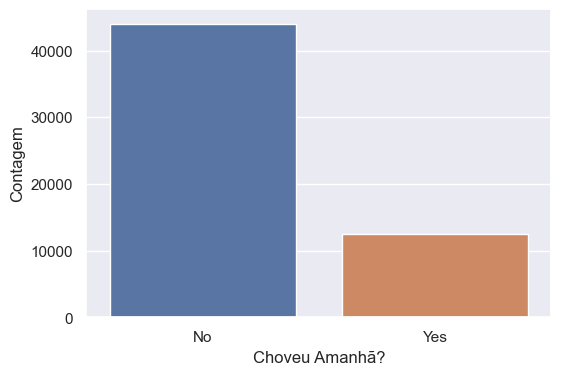

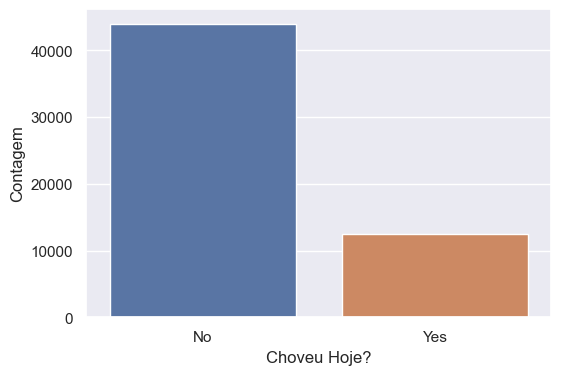

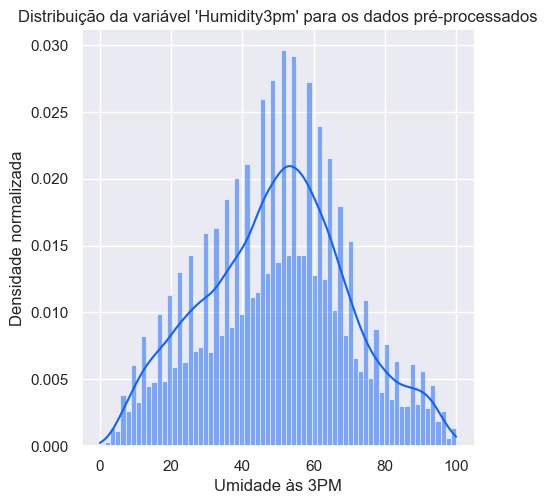

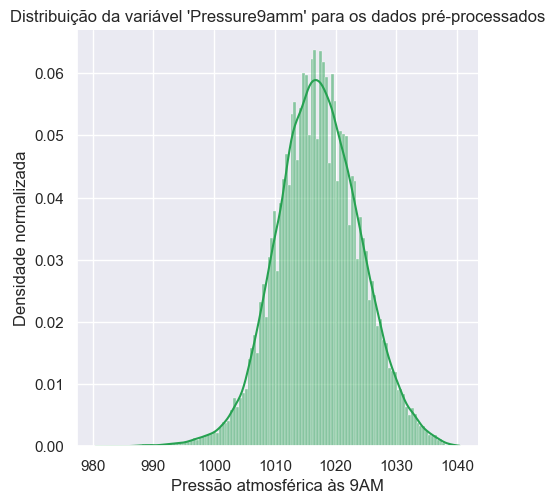

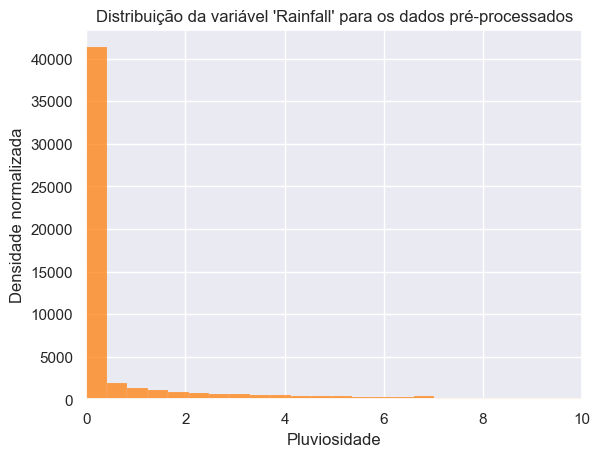

In [37]:
# Visualizar as distribuições das features
visualize_data(df)

In [38]:
# Dividir os dados em conjuntos de treinamento e validação
x_train, x_val, y_train, y_val = split_data(df)

In [39]:
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [44]:
model = build_model(input_shape=(x_train.shape[1],))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [42]:
x_val = np.array(x_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.int32)
# Avaliar o desempenho do modelo
y_pred_prob = model.predict(x_val)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", report)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).